In [1]:
from Postprocess_functions import *

Welcome to JupyROOT 6.26/10


In [2]:
import gmsh
import sys
import os
from os.path import exists
import subprocess
import numpy as np
import time
import ROOT
from os import listdir
from os.path import isfile, join
import os.path
from os import path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import argparse
from ROOT import TFile, TTree
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev,splprep
from scipy.interpolate import BSpline
import math
def Initialization_Mult(args):
    print('Initializations')
    gen=[]
    gen_file=[]
    NSGA_files=[]
    root_folder=[]
    pictures_folder=[]
    pictures_folder_pareto=[]
    pictures_folder_filter=[]
    pictures_folder_filter_shape=[]
    
    c=0
    for fol in args.folder:
        root_folder.append(fol)
        gen.append(args.generation[c])
        print(gen)
        folder_path='/home/greales/Desktop/NSGAIIData/2307/'+root_folder[c] # add path to ROOT/
        rf=os.listdir(folder_path)		# get all files in the folder
        NSGA_filenames = find_strings_containing_substring(rf, 'NSGAII_') # Get all root files
        print(rf)
        NSGA_filenames=sort_strings_by_int(NSGA_filenames)
        prefix = folder_path+'/'
        NSGA_files.append([prefix+s for s in NSGA_filenames])
        print(str(gen[c]))
        gen_file.append(folder_path+'/'+find_strings_containing_substring(rf, str(gen[c]))[0]) # Get last generation file or given gen.
        print('pictures/ROOT/'+root_folder[c]+'/Shape/')
        pictures_folder.append('pictures/ROOT/'+root_folder[c]+'/Shape/')
        print(pictures_folder)
        pictures_folder_pareto.append('pictures/ROOT/'+root_folder[c]+'/Pareto/')
        pictures_folder_filter.append('pictures/ROOT/'+root_folder[c]+'/Filter/')
        pictures_folder_filter_shape.append('pictures/ROOT/'+root_folder[c]+'/Filter/Shape_gen'+str(gen[c])+'/')

        create_folder(pictures_folder[c])  # Create required folders to store pictures
        create_folder(pictures_folder_pareto[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter[c])  # Create required folders to store pictures
        create_folder(pictures_folder_filter_shape[c])  # Create required folders to store pictures
        c+=1
        print('### Initializations END')
    return gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape


In [31]:
# Fill the class with the required inputs:

class ArgValues:
    def __init__(self):
        self.folder = ["G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03"]
        #self.folder = "G11_objLC_Acte_YSym_SiMPmatch6mm_68Evts_Spline_23-02-09"
        #self.folder ="G11_objLC_Acte_NoYSym_SiMPmatch3_6mm_68Evts_Spline_23-02-12"
        self.generation = [32,11,13,100,99,21]
        self.Ysym = [1,1,1,1,1,1]
        self.LYSOL = [1,1,1,1,1,1]
        self.save = 1
        self.Shape = 0
        self.ParetoFrontier = 0
        self.Filter = 1
        self.LaunchIndv = 0
args0=ArgValues()

In [33]:
gen, gen_file, NSGA_files, root_folder, pictures_folder, pictures_folder_pareto, pictures_folder_filter, pictures_folder_filter_shape= Initialization_Mult(args0)
gen_file

Initializations
[32]
['NSGAII_3.root', 'NSGAII_14.root', 'NSGAII_11.root', 'NSGAII_17.root', 'NSGAII_2.root', 'NSGAII_0.root', 'NSGAII_5.root', 'NSGAII_12.root', 'NSGAII_16.root', 'NSGAII_8.root', 'NSGAII_7.root', 'NSGAII_29.root', 'NSGAII_26.root', 'NSGAII_13.root', 'NSGAII_4.root', 'NSGAII_18.root', 'NSGAII_27.root', 'NSGAII_28.root', 'NSGAII_9.root', 'NSGAII_10.root', 'NSGAII_31.root', 'NSGAII_20.root', 'NSGAII_25.root', 'NSGAII_32.root', 'NSGAII_24.root', 'NSGAII_30.root', 'NSGAII_22.root', 'NSGAII_23.root', 'NSGAII_1.root', 'NSGAII_6.root', 'NSGAII_19.root', 'NSGAII_15.root', 'NSGAII_21.root']
32
pictures/ROOT/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/
['pictures/ROOT/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/']
pictures/ROOT/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Shape/ already exists.
pictures/ROOT/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/Pareto/ already exists.
pictures/ROOT/G11_objLC_Acte_N

['/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/NSGAII_32.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17/NSGAII_11.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19/NSGAII_13.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24/NSGAII_100.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27/NSGAII_99.root',
 '/home/greales/Desktop/NSGAIIData/2307/G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03/NSGAII_21.root']

### Filter - PF


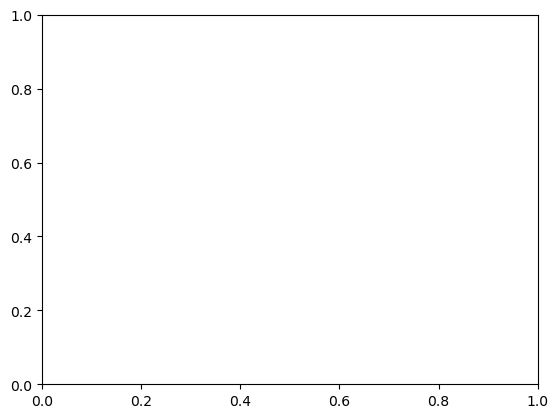

In [5]:
	##############
	### FILTER ###
	##############
print('### Filter - PF')
fig1, ax1 = plt.subplots()

def plt_filtered_PF(fig1,ax1,gen_file,colorf,colore,lab='',mk='o'):
    # Get required input for plotting the crystal shapes
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file)
    obj1f,obj2f,idxf=filter_values(obj1,obj2,5,1)
    print(idxf)
    #ax1.errorbar(obj1f,obj2f, fmt='o', capsize=3)
    ax1.scatter(obj1f,obj2f, s=19, c=colorf, edgecolor=colore, marker=mk,label=lab)
#    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)


In [6]:
# Get required input for plotting the crystal shapes
ind=0
folder_path='/home/greales/Desktop/NSGAIIData/2307/'
folder = ["G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16",
                       "G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17",
                       "G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19",
                      "G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24",
                      "G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27",
                      "G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03"]

shortname=['LCAvg','LC3x6Avg','LCP50','LOP50','LStP50','LstAvg']
gen=[8,8,8,8,8,12]
fnames='NSGAII_'
gen_file=[folder_path+fi+'/'+fnames+str(g)+'.root' for fi,g in zip(folder,gen)]
print(gen_file)
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text



['/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x3_68Evts_Spline_23-07-16/NSGAII_8.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLC_Acte_NoYSym_ESRBP_SiMP_3x6_68Evts_Spline_23-07-17/NSGAII_8.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLCP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-19/NSGAII_8.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLOP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-24/NSGAII_8.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLStP50_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-07-27/NSGAII_8.root', '/home/greales/Desktop/NSGAIIData/2307/G11_objLStAvg_Acte_NoYSym_ESRBP_SiMP_3x3_60Evts_Spline_23-08-03/NSGAII_12.root']


In [7]:
# Get required input for plotting the crystal shapes
ind=0
def crystalcoords_mult(gen_file,arg0,ind,vol):
    num_indv,num_vars,obj1,obj2,vars_tuple,lstvars = GetRootVariables(gen_file[ind])
    obj1f,obj2f,idxf=filter_values(obj1,obj2,40)
    #print(obj2f)
    closest, closest_index=closest_value(obj2f,vol)
    #print('### Objective values: ',obj2f[closest_index-1],' ', obj1f[closest_index-1],' ',obj1f[closest_index-1]/obj2f[closest_index-1])
    print('### Objective values: ',closest,' ' ,closest_index,' ', obj1f[closest_index],' ',obj1f[closest_index]/obj2f[closest_index])
    #print(obj2f[closest_index+1],' ', obj1f[closest_index+1],' ',obj1f[closest_index+1]/obj2f[closest_index+1])
    original_idx = idxf[closest_index]
    #print(vars_tuple[original_idx])

    Zhalf=28.5
    Yhalf=1.5
    #with original_idx as indv:	### optional variable arguments
    indv = original_idx
    ### get spline control points for different scenarions
    args=arg0
    legend_text='\nVolume: '+str(int(obj2f[closest_index]))+'\\si{\cubic\milli\meter}'+'\nLC: '+str(int(-obj1f[closest_index]))+'[ph]'
    if(args.Ysym[ind]==1):
        print("NoYSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_NoYSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_NoYSym(num_vars,vars_tuple,Zhalf,Yhalf,indv)				
    else:
        print("YSym")
        if (args.LYSOL[ind]==1):
            print("LYSOL")
            #print("Length:",vars_tuple)
            xtop,ytop,xbot,ybot = SplinePts_YSym_L(num_vars-1,vars_tuple,Yhalf,indv)
        else:
            xtop,ytop,xbot,ybot = SplinePts_YSym(num_vars,vars_tuple,Yhalf,Zhalf,indv)
    return xtop,ytop,xbot,ybot,legend_text


In [29]:
import matplotlib as mpl

def setup_pgf():
    pgf_with_latex = {
        "pgf.texsystem": "pdflatex",
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "axes.labelsize": 10,
        "font.size": 10,
        "legend.fontsize": 4,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "pgf.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage[detect-all]{siunitx}",
        ])
    }
    mpl.use("pgf")
    mpl.rcParams.update(pgf_with_latex)
 # Set the figure size

    # Set the figure size based on LaTeX geometry settings
    geometry_textwidth = 384  # pt
    pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
    plot_width = geometry_textwidth * pt_to_inch *0.5
    
    mpl.rcParams['figure.figsize'] = (plot_width, plot_width*0.9)  # Adjust the height as needed (6 inches in this example)
def restore_defaults():
    mpl.rcParams.update(mpl.rcParamsDefault)
setup_pgf()

In [34]:
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig1, ax1 = plt.subplots(figsize=(plot_width, plot_width*0.9))

xtop,ytop,xbot,ybot,legend_text = crystalcoords_mult(gen_file,args0,0,513)
Plt_Crystal(xtop,ytop,xbot,ybot,fig1,ax1,'gray',lab='SiPM 3\\si{\milli\meter}x3.75\\si{\milli\meter}'+legend_text,
           lnstyle='-', lnwidth=1, alph=0.8)
Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

ax1.plot([-28.5,28.5], [0.375,0.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [-0.375,-0.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [3.375,3.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,28.5], [-3.375,-3.375],color='darkgray',linestyle='dotted')
ax1.plot([-28.5,-28.5], [3.375,-3.375],color='darkgray',linestyle='dotted')
ax1.plot([28.5,28.5], [3.375,-3.375],color='darkgray',linestyle='dotted')


L1=23
x1=28.5*3/L1/2
xs=1.5
Ls=L1+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [xs,-xs],color='darkgray',linestyle='-')

ax1.plot([Ls,L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([Ls,L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([Ls,Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [xs,-xs],color='darkgray',linestyle='-')

plt.xlim((-32,32))
L1=28.5
Ls=28.5+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-L1,-L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([Ls,L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([Ls,L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([Ls,Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([L1,L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([0,0], [-2.2,2.2],color='black',linestyle='dashdot')

plt.axis('off')

#ax1.annotate('x', xy=(0, 0), xytext=(5, 0),
#            arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('$y_{min}$', xy=(-26, 0.25), xytext=(-20, 0.5))
ax1.annotate('$y_{max}$', xy=(-26, 0.25), xytext=(-20, 3.5))
ax1.annotate('$y_{0}$', xy=(-26, 0.25), xytext=(-34, 1.6))
ax1.annotate('$SiPM_{0}$', xy=(-26, 0.25), xytext=(-35, -0.5),rotation=90, c='gray')
#ax1.annotate('$SiPM_{1}$', xy=(-26, 0.25), xytext=(-27, -0.5),rotation=90, c='gray')

ax1.annotate('Lateral View', xy=(-26, 0.25), xytext=(3, 3.5), c='black')


ax1.annotate('Control Points', xy=(xtop[0]+0.1, ytop[0]+0.1), xytext=(xtop[0]+1, ytop[0]+1.1))
ax1.annotate('', xy=([xtop[1]+0.1, ytop[1]+0.1]), xytext=(xtop[0]+15, ytop[0]+00.8),
            arrowprops={'arrowstyle': '->'}, va='center')
ax1.annotate('', xy=([xtop[2]+0.1, ytop[2]+0.1]), xytext=(xtop[0]+15, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')
ax1.annotate('', xy=([xtop[3]+0.1, ytop[3]+0.1]), xytext=(xtop[0]+15, ytop[0]+0.8),
            arrowprops={'arrowstyle': '->'}, va='center')


ax1.annotate('z', xy=(0,0), xytext=(7,0),
            arrowprops={'arrowstyle': '<-'}, va='center')
ax1.annotate('y', xy=(2,0), xytext=(0.5,1.5),
            arrowprops={'arrowstyle': '<-'}, va='center')
#ax1.arrow(0, 0, 3, 0, head_width=0.2)

plt.show()
plt.draw()

fig1.tight_layout()
#fig1.savefig("Figures/LYSOSplineSchematic.pdf")
plt.savefig("Figures/LYSOSplineSchematic.pdf", bbox_inches='tight')


The number of vars per indv is :11
The number indv is :200
### Objective values:  511.548536580355   58   -16780.57627118644   -32.80348798055943
NoYSym
LYSOL


/tmp/ipykernel_214965/863782536.py:78: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [30]:
geometry_textwidth = 384  # pt
pt_to_inch = 1.0 / 72.27  # Conversion factor from points to inches
plot_width = geometry_textwidth * pt_to_inch *0.5
fig1, ax1 = plt.subplots(figsize=(plot_width, plot_width*0.9))

Plt_DefaultCrystal(fig1,ax1,colori='lightgray',ls='dotted')

x1=4.75/2
xs=1.5
L1=18
Ls=L1+1.8
ax1.plot([-L1,L1], [x1,x1],color='darkgray',linestyle='-')
ax1.plot([-L1,L1], [-x1,-x1],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [x1,-x1],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [x1,-x1],color='darkgray',linestyle='-')

x1=4.75/2
xs=1.5
L1=18
Ls=L1+1.8
ax1.annotate('$Z_1$', xy=(-L1,xs*1.5), xytext=(+L1,xs*1.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax1.plot([-Ls,-L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-Ls,-Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([-L1,-L1], [xs,-xs],color='darkgray',linestyle='-')

ax1.plot([Ls,L1], [xs,xs],color='darkgray',linestyle='-')
ax1.plot([Ls,L1], [-xs,-xs],color='darkgray',linestyle='-')
ax1.plot([Ls,Ls], [xs,-xs],color='darkgray',linestyle='-')
ax1.plot([L1,L1], [xs,-xs],color='darkgray',linestyle='-')

L1=28.5
Ls=28.5+1.8

ax1.plot([-Ls,-L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-Ls,-Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([-L1,-L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.plot([Ls,L1], [xs,xs],color='lightgray',linestyle='--')
ax1.plot([Ls,L1], [-xs,-xs],color='lightgray',linestyle='--')
ax1.plot([Ls,Ls], [xs,-xs],color='lightgray',linestyle='--')
ax1.plot([L1,L1], [xs,-xs],color='lightgray',linestyle='--')

ax1.annotate('z', xy=(0,0), xytext=(10,0),
            arrowprops={'arrowstyle': '<-'}, va='center')
ax1.annotate('x', xy=(0.,0), xytext=(-1,1),
            arrowprops={'arrowstyle': '<-'}, va='center')

ax1.annotate('$Z_0$', xy=(-28.5,2.5), xytext=(+28.5,2.5),
            arrowprops={'arrowstyle': '<->'}, va='center')

ax1.annotate('$X_0$', xy=(+32.5,1.55), xytext=(+30.,-1.7),
            arrowprops={'arrowstyle': '<->'}, va='center', rotation=90)

ax1.annotate('$X_1$', xy=(-32.5,2.4), xytext=(-35.5,-2.6),
            arrowprops={'arrowstyle': '<->'}, va='center', rotation=90)

plt.axis('off')

plt.show()
plt.draw()
fig1.tight_layout()
plt.savefig("Figures/LYSOAreaSchematic.pdf", bbox_inches='tight')


/tmp/ipykernel_214965/1399182883.py:63: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


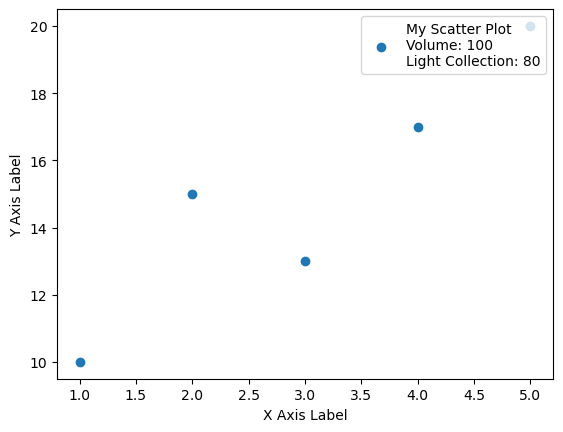

In [13]:
import matplotlib.pyplot as plt

# Generate some data for the scatter plot
x = [1, 2, 3, 4, 5]
y = [10, 15, 13, 17, 20]

# Create the scatter plot
plt.scatter(x, y)

# Add labels to the axes
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# Create the legend with the plot name, volume, and light collection
legend_text = 'My Scatter Plot\nVolume: 100\nLight Collection: 80'
plt.legend([legend_text], loc='upper right')

# Show the plot
plt.show()

In [15]:
	if(args.save==1):
			imagename="LYSO_Vol_"+str(round(obj2[indv],1))+"_LC_"+str(round(abs(obj1[indv]),1))
			save_name=pictures_folder_filter+imagename
			print(save_name)
			plt.savefig(save_name, format='png', dpi=300, bbox_inches='tight')
	"""except:
		imagename="LYSO_Vol_"+str(round(obj2[indv],1))+"_LC_"+str(round(abs(obj1[indv]),1))
		print("### ERROR: ",pictures_folder_filter+imagename)*/		"""

NameError: name 'args' is not defined

In [ ]:
import matplotlib.pyplot as plt

def plot_with_error_bars(x, y, xerr):
    fig, ax = plt.subplots()
    ax.errorbar(x, y, xerr=xerr, fmt='o', capsize=3)
    ax.set_xlabel("X data")
    ax.set_ylabel("Y data")
    plt.show()
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
xerr = [0.5, 0.4, 0.3, 0.2]

plot_with_error_bars(x, y, xerr)

In [58]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 214.4 kB/s eta 0:00:00m eta 0:00:010:00:02


In [59]:
from pygmo import hypervolume

# Assume solutions is a 2D list where each inner list is a solution
solutions = [[1,0], [0.5,0.5], [0,1]]

# Create a hypervolume object
hv = hypervolume(solutions)

# Define the reference point
reference_point = [1.1, 1.1]  # This should be slightly greater than the maximum objective values

# Calculate hypervolume
volume = hv.compute(reference_point)

print(f"The hypervolume is: {volume}")

The hypervolume is: 0.4600000000000002


In [63]:
test = [[i,j] for i,j in zip(obj1,obj2)]
# Create a hypervolume object
hv = hypervolume(test)

# Define the reference point
reference_point = [4000, 513]  # This should be slightly greater than the maximum objective values

# Calculate hypervolume
volume = hv.compute(reference_point)

print(f"The hypervolume is: {volume}")

The hypervolume is: 2861957.189749266
